In [ ]:
%matplotlib inline
from pylab import *
import matplotlib.cm as cm 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy as sp
import scipy.linalg
def f(x,y):
    return (x-2)**2*sin(y-1)**2+x**2+y**2

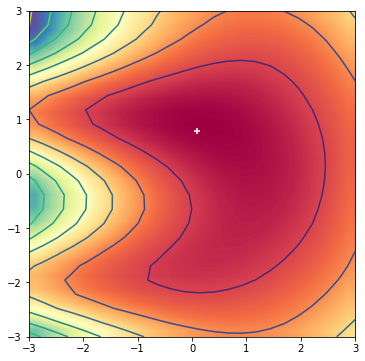

In [ ]:
rcParams['figure.figsize']=(8.0,6.0)
delta = 0.25
x = arange(-3,3,delta)
y = arange(-3,3,delta)
X,Y =meshgrid(x,y)
Z = f(X,Y)
im = plt.imshow(Z, interpolation='bilinear', origin ='lower', cmap=cm.Spectral, extent=(-3,3,-3,3))
cs = plt.contour(Z, linewidths = 1.5, extent=(-3,3,-3,3))
plt.scatter(0.0917, 0.7790,color='white',marker='+')

In [ ]:
def collect(b):
    L=[]
    for el in b:
        L.extend(el)
    return L

In [ ]:
def jacobienne(z):
    x0=z.tolist();
    x=z[0][0];
    y=z[1][0];
    J=np.zeros((2,1));
    J[0,0]=2*(x-2)*(sin(y-1))**2+2*x;
    J[1,0]=((x-2)**2)*sin(2*(y-1))+2*y;
    return J;

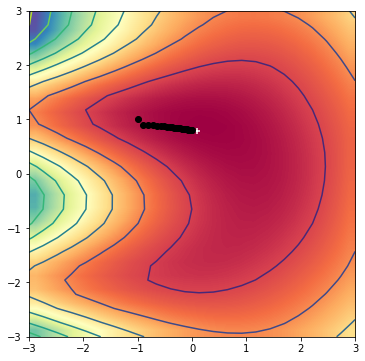

In [ ]:
#Méthode du Gradient:
mini=np.array([[0.0917], [0.7790]])
x0=np.array([[-1],[1]])
step = 0.05
eps = 10e-3
previous_step = 0.5 
x_gr=[collect(x0)[0]]
y_gr=[collect(x0)[1]]
k=0
I=[k]
residu=[sp.linalg.norm(x0- mini) ]
while previous_step > eps :
    xi = x0 
    x0 = x0 - step * jacobienne(x0) 
    previous_step = sp.linalg.norm(x0- xi) 
    residu.append(sp.linalg.norm(x0- mini))
    x_gr.append(collect(x0)[0])
    y_gr.append(collect(x0)[1])
    k+=1
    I.append(k)
    


im=plt.imshow(Z,interpolation='bilinear',origin='lower',cmap=cm.Spectral,extent=(-3,3,-3,3))
CS=plt.contour(Z,linewidths=1.5,extent=(-3,3,-3,3))
plt.scatter(0.0917, 0.7790,color='white',marker='+')

#Les points de l'itération avec la méthode du Gradient:
for i in range(len(x_gr)):
    plt.scatter(x_gr[i],y_gr[i],color='black')

In [ ]:
def hessienne(z):
    x0=z.tolist();
    x=z[0][0];
    y=z[1][0];
    H=np.zeros((2,2));
    H[0,0]=2*((sin(y-1))**2+1);
    H[1,1]=2*(((x-2)**2)*cos(2*(y-1))+1);
    H[1,0]=2*(x-2)*sin(2*(y-1));
    H[0,1]=2*(x-2)*sin(2*(y-1));
    return H;

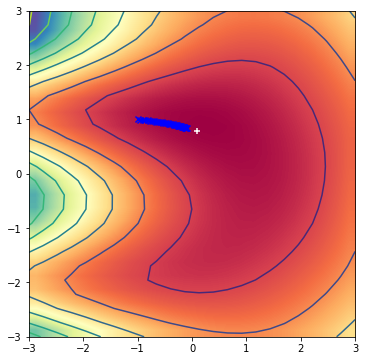

In [ ]:
#Méthode de Newton:

x0=np.array([[-1],[1]])  
x_hes=[collect(x0)[0]]
y_hes=[collect(x0)[1]]
first_step = 1
j=0
J=[j]
res=[sp.linalg.norm(x0- mini)]
while first_step > eps :
    xi = x0 
    x0 = x0 - step *np.dot(np.linalg.inv (hessienne(x0)) , jacobienne(x0)) 
    first_step = sp.linalg.norm(x0- xi) 
    res.append(sp.linalg.norm(x0- mini) )
    x_hes.append(collect(x0)[0])
    y_hes.append(collect(x0)[1])
    j+=1
    J.append(j)
    
im=plt.imshow(Z,interpolation='bilinear',origin='lower',cmap=cm.Spectral,extent=(-3,3,-3,3))
CS=plt.contour(Z,linewidths=1.5,extent=(-3,3,-3,3))
plt.scatter(0.0917, 0.7790,color='white',marker='+')


#Les points de l'itération avec la méthode de Newton:
for i in range(len(x_hes)):
    plt.scatter(x_hes[i],y_hes[i],color='blue',marker='x')

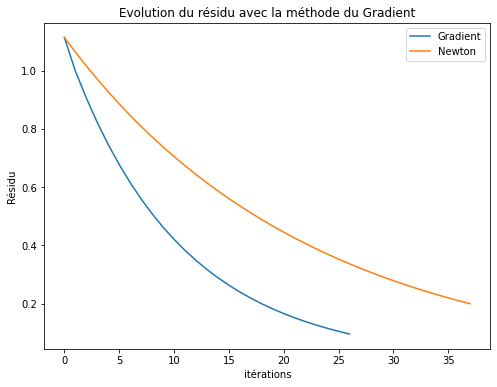

In [ ]:
plt.plot(I,residu,label='Gradient')
plt.plot(J,res,label='Newton')
plt.xlabel('itérations')
plt.ylabel('Résidu')
plt.title('Evolution du résidu avec la méthode du Gradient')
plt.legend() 
plt.show()